# 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。


sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation


データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。


pandas.DataFrame — pandas 0.24.2 documentation


X =


目的変数も同様にyに格納してください。


y =




In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# DLと確認
iris = load_iris()
print(iris.keys())

X = iris.data
y = iris.target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


# 問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。


df =

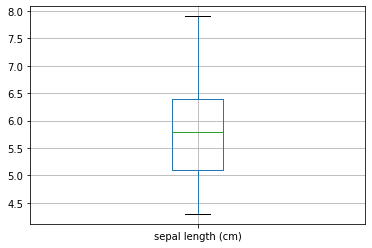

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# dataをpdで変換
X = pd.DataFrame(X, columns=iris.feature_names)
y = pd.Series(y, name="target")

# 結合する
df = pd.concat([X, y], axis=1)
df

#df.boxplot(by="target")
df.boxplot(column="sepal length (cm)")

# 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
ラベルごとのサンプル数の合計を出力する。
特徴量に欠損値があるかを確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

In [3]:
#先頭を４文字表示させる
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [4]:
# dfのデータ数等を出力させ、数値か文字列か判断する
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
# 欠損値の確認
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
# ラベルごとの数、平均、標準偏差、最小値を出力させる
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
#からむ名の所得
df.columns.values

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'], dtype=object)

In [8]:
# DataFrameの値の所得
import numpy as np
np.set_printoptions(threshold=10)
df.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       ...,
       [6.5, 3. , 5.2, 2. , 2. ],
       [6.2, 3.4, 5.4, 2.3, 2. ],
       [5.9, 3. , 5.1, 1.8, 2. ]])

In [9]:
# 種類の把握
df["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

In [10]:
# iris keysで調べる
print(iris.keys())

"""
順に説明すると
'data' ：irisの花びらのサイズや長さが記載されており、150個のデータセットが確認できる
'target' ；irisの花の種類が格納されており、ここでは３種類を数字0,1,2で格納されている
'target_names'：targetの３種類の花の名前がわかる。'setosa', 'versicolor', 'virginica'の３種類が格納されている
'DESCR'：データセットの最大値、最小値の数値や作成された年度など背景についてかなり詳細に記載されている
'feature_names'：dataに含まれる４種類の特徴量の名前。
'filename'：ロードしているディレクトリ階層が判明できる
※'frameについて出力させたが何も表示されず、DESCRでも表示されないためここでは割愛する。
"""

# DESCRにかなり詳細な情報が記載されているため確認をする
print(iris.DESCR)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1

# 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


sepal_widthの列を３つの異なる方法で抽出する
50番目から99番目までのデータを抽出する
petal_lengthの列の50番目から99番目までのデータを抽出する
petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。



In [11]:
# sepal_widthを３つの方法で所得する
pd.set_option("display.max_rows", 10)

# 3の方法
print(df["sepal width (cm)"][50:100]) # iloc,loc利用なし
print(df.loc[50:100, "sepal width (cm)"]) # loc
print(df.iloc[50:100, 1]) # iloc

# petal_widthの値が0.2のデータを抽出する
print(df["petal width (cm)"][df["petal width (cm)"] == 2])

"""
loc, locの違いについて
loc：indexやclomunのラベル名前を用いて抽出している。
iloc：indexやcolumnの位置情報を用いて抽出している。

"""

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
     ... 
95    3.0
96    2.9
97    2.9
98    2.5
99    2.8
Name: sepal width (cm), Length: 50, dtype: float64
50     3.2
51     3.2
52     3.1
53     2.3
54     2.8
      ... 
96     2.9
97     2.9
98     2.5
99     2.8
100    3.3
Name: sepal width (cm), Length: 51, dtype: float64
50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
     ... 
95    3.0
96    2.9
97    2.9
98    2.5
99    2.8
Name: sepal width (cm), Length: 50, dtype: float64
110    2.0
113    2.0
121    2.0
122    2.0
131    2.0
147    2.0
Name: petal width (cm), dtype: float64


'\nloc, locの違いについて\nloc：indexやclomunのラベル名前を用いて抽出している。\niloc：indexやcolumnの位置情報を用いて抽出している。\n\n'

# 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。



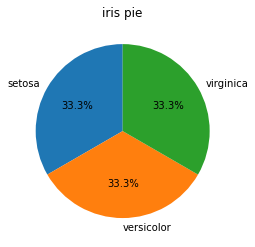

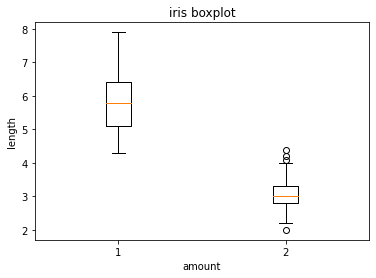

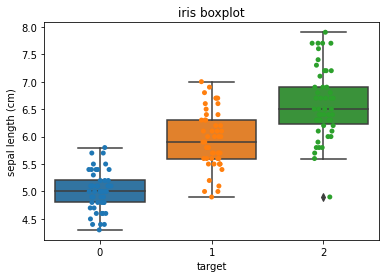

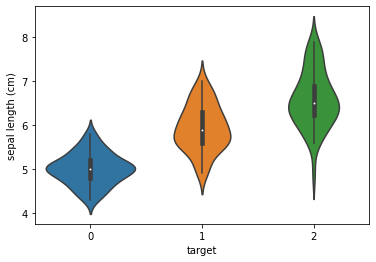

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
# 各データを合計する
sum_target = df["target"].value_counts()

plt.title("iris pie")
plt.pie(sum_target, counterclock=True, startangle=90,
          autopct="%1.1f%%", labels=iris.target_names)
plt.show()

# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
plt.title("iris boxplot")
plt.xlabel("amount")
plt.ylabel("length")
plt.boxplot([df["sepal length (cm)"], df["sepal width (cm)"]])
plt.show()

plt.title("iris boxplot")
plt.xlabel("amount")
plt.ylabel("length")
sns.boxplot(x=df["target"], y=df["sepal length (cm)"], data=df)
sns.stripplot(x=df["target"], y=df["sepal length (cm)"], data=df)
plt.show()

# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
sns.violinplot(x=df["target"], y=df["sepal length (cm)"], data=df)



# 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。


縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
４つの特徴量に関する相関係数行列を作る
相関係数行列のヒートマップを作る(１つ)

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。


pandas.DataFrame.corr — pandas 0.24.2 documentation

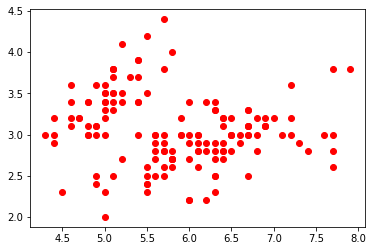

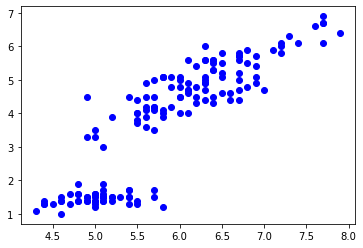

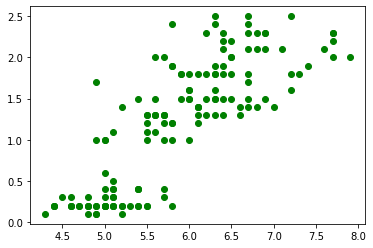

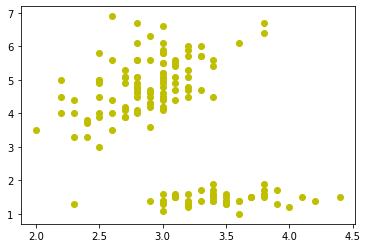

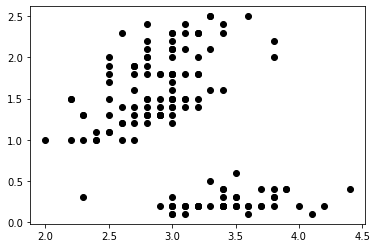

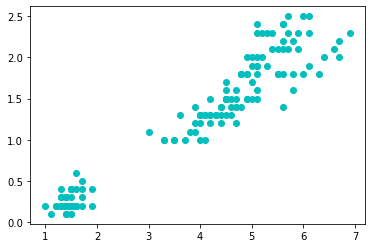

In [13]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ) 
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c="r")
plt.show()

plt.scatter(df["sepal length (cm)"], df["petal length (cm)"], c="b")
plt.show()

plt.scatter(df["sepal length (cm)"], df["petal width (cm)"], c="g")
plt.show()

plt.scatter(df["sepal width (cm)"], df["petal length (cm)"], c="y")
plt.show()

plt.scatter(df["sepal width (cm)"], df["petal width (cm)"], c="k")
plt.show()

plt.scatter(df["petal length (cm)"], df["petal width (cm)"], c="c")
plt.show()

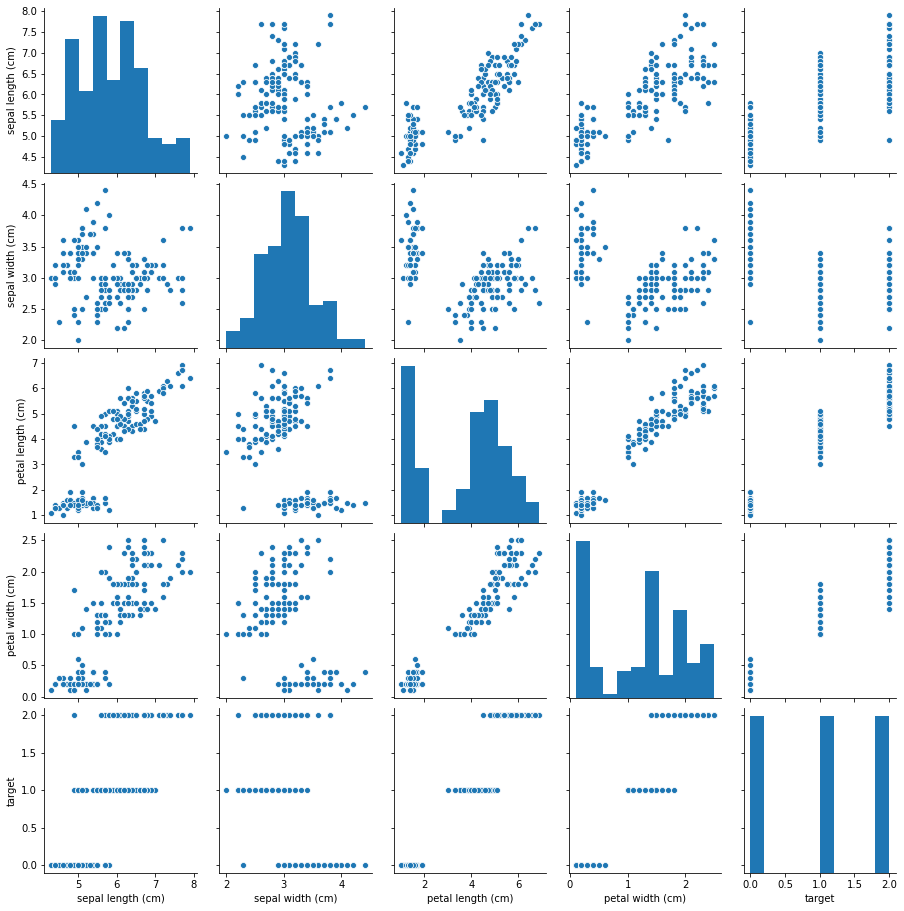

In [14]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
sns.pairplot(df)
plt.show()

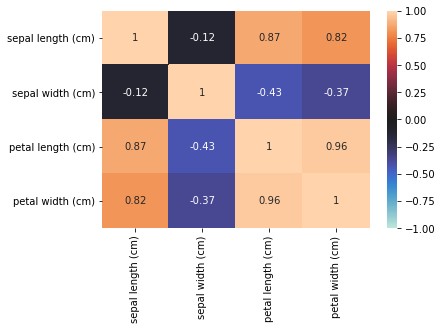

In [15]:
#４つの特徴量に関する相関係数行列を作る 
pearson_matrix = X.corr()


#相関係数行列のヒートマップを作る(１つ)
sns.heatmap(data=pearson_matrix,
                   vmin=-1.0,
                   vmax=1.0,
                   center=0.0,
                   annot=True)
plt.show()

# 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。


例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

In [16]:
#　色んな考察

'''
散布図行列から見た所、sepal length (cm), sepal width (cm)は正の相関があるため、増加すれば片方も増加する関係にある
また同様に、petal length (cm)','petal width (cm)に関しても正の相関関係がある。

ヒートマップではlength同士は負の相関が少しあった。

また、箱ひげで確認できたが多少外れ値が存在しているが、それほど多くないためここでは前処理が不要な事も可能。
ただし、外れ値があまりに多い場合は前処理にていくつか処分する必要がある。
（外れ値が全くないと過学習の危険性が考えられるため、あえて多少残しておく。バギングやブースティングを使う場合は削っても良い気もする）

violinplotでは、2の最大値、最小値周辺はデータが少なくなっており、中央に固まっているため分散は小さい
他はバランスよくデータが散らばっている。

'''

"\n散布図行列から見た所、sepal length (cm), sepal width (cm)は正の相関があるため、増加すれば片方も増加する関係にある\nまた同様に、petal length (cm)','petal width (cm)に関しても正の相関関係がある。\n\nヒートマップではlength同士は負の相関が少しあった。\n\nまた、箱ひげで確認できたが多少外れ値が存在しているが、それほど多くないためここでは前処理が不要な事も可能。\nただし、外れ値があまりに多い場合は前処理にていくつか処分する必要がある。\n（外れ値が全くないと過学習の危険性が考えられるため、あえて多少残しておく。バギングやブースティングを使う場合は削っても良い気もする）\n\nviolinplotでは、2の最大値、最小値周辺はデータが少なくなっており、中央に固まっているため分散は小さい\n他はバランスよくデータが散らばっている。\n\n"